In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [37]:
from qutip import *
from math import *

In [38]:
wc = 1.0  * 2 * pi  # cavity frequency
wa = 1.0  * 2 * pi  # atom frequency
g  = 0.05 * 2 * pi  # coupling strength
kappa = 0.005       # cavity dissipation rate
gamma = 0.05        # atom dissipation rate
N = 10              # number of cavity fock states
n_th_a = 0.0        # avg number of thermal bath excitation
use_rwa = True

tlist = np.linspace(0,25,101)

In [39]:
# intial state
#psi0 = tensor(coherent(N, alpha=1.0), basis(2,1))    # start with an excited atom and coherent light
psi0 = tensor(basis(N, 5), basis(2,1))
# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))


# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

In [40]:
c_ops = []

# cavity relaxation
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(sqrt(rate) * a)

# cavity excitation, if temperature > 0
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(sqrt(rate) * a.dag())

# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(sqrt(rate) * sm)

In [41]:
#output = mesolve(H, psi0, tlist, [], [a.dag() * a, sm.dag() * sm])

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

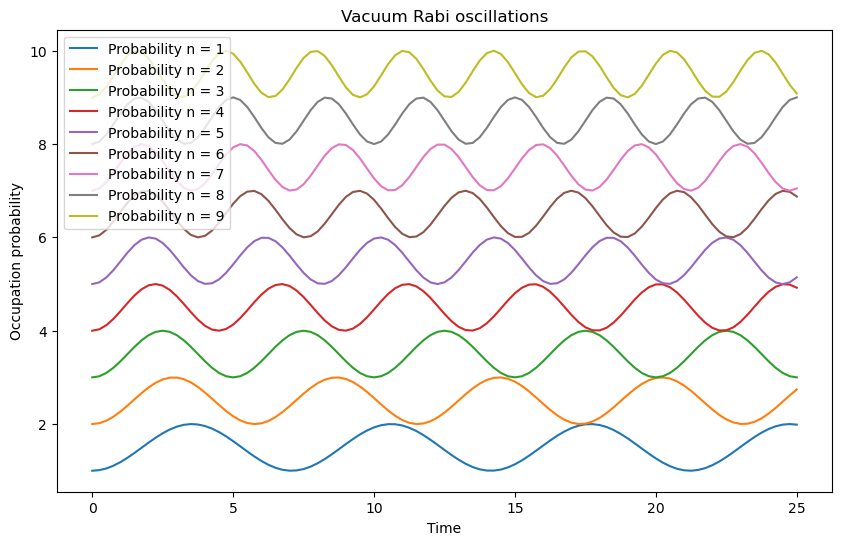

In [44]:
output = mesolve(H, psi0, tlist, [], [])

#n_c = output.expect[0]
#n_a = output.expect[1]
psi_t=output.states
l=len(psi_t)
Prob=[]
fig, axes = plt.subplots(1, 1, figsize=(10,6))

for k in range(1,10):
    N=20
    psi0 = tensor(basis(N, k), basis(2,1))
    a  = tensor(destroy(N), qeye(2))
    sm = tensor(qeye(N), destroy(2))

    # Hamiltonian
    if use_rwa:
        H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
    else:
        H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())
    output = mesolve(H, psi0, tlist, [], [a.dag() * a])
    psi_t=output.states
    Prob=[]

    nc = output.expect[0]

    axes.plot(tlist, nc, label="Probability n = {}".format(k))
#axes.plot(tlist, n_c, label="Cavity")
#axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')

In [43]:
psi = tensor(basis(2, 0), basis(2, 1))
psi.ptrace(0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]